In [1]:
import pandas as pd
import seaborn as sns
import numpy as np5
import sklearn
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



In [2]:
data=pd.read_csv('bmi.csv')
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [3]:
gender= LabelEncoder()
data["Gender"]= gender.fit_transform(list(data["Gender"]))
print(data.head())

   Gender  Height  Weight  Index
0       1     174      96      4
1       1     189      87      2
2       0     185     110      4
3       0     195     104      3
4       1     149      61      3


In [4]:
##replace the values of bins with their corresponding values in the health array
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight', 'fit', 'slightly overweight', 'overweight', 'slightly overqeight']
data['Index']= pd.cut(data['Index'], bins=bins, labels= health)
print(data['Gender'].value_counts())
print(data)


0    255
1    245
Name: Gender, dtype: int64
     Gender  Height  Weight                Index
0         1     174      96           overweight
1         1     189      87                  fit
2         0     185     110           overweight
3         0     195     104  slightly overweight
4         1     149      61  slightly overweight
..      ...     ...     ...                  ...
495       0     150     153  slightly overqeight
496       0     184     121           overweight
497       0     141     136  slightly overqeight
498       1     150      95  slightly overqeight
499       1     173     131  slightly overqeight

[500 rows x 4 columns]


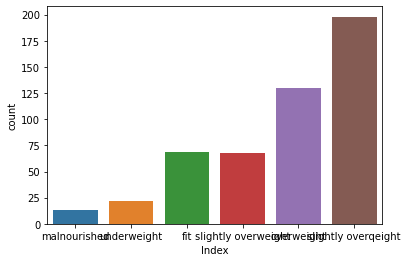

In [5]:
sns.countplot(data['Index'])

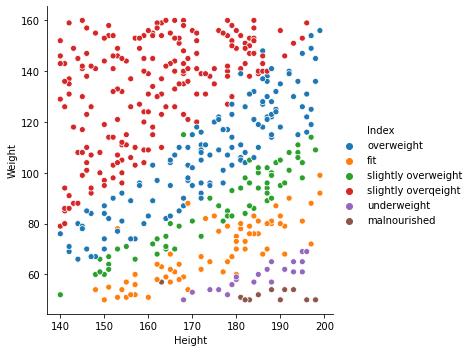

In [6]:
sns.relplot(x='Height', y= 'Weight', hue="Index", data= data)

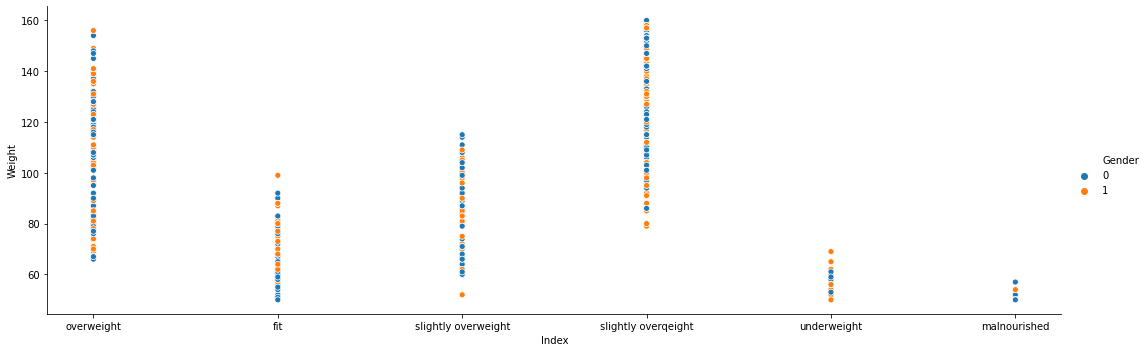

In [7]:
sns.relplot(x='Index', y= 'Weight', hue="Gender", data= data,height=5, aspect =3)

In [8]:
##now we use support vector machines to predict the BMI

x= data.drop('Index',axis=1)
y= data['Index']

In [9]:
x_train, x_test, y_train, y_test= sklearn.model_selection.train_test_split(x,y, test_size= 0.2, random_state=0)

##implementing the classifiers
s= StandardScaler()
x_train= s.fit_transform(x_train)
x_test=s.transform(x_test)



clf= svm.SVC(kernel='linear', C=3)
model=clf.fit(x_train, y_train)
acc= clf.score(x_train, y_train)
print(acc)
bmi_predictions= model.predict(x_test)


0.95


In [10]:
print(y_test)
print(classification_report(y_test, bmi_predictions))

90     slightly overqeight
254    slightly overqeight
283             overweight
445    slightly overqeight
461    slightly overqeight
              ...         
372            underweight
56              overweight
440             overweight
60            malnourished
208    slightly overweight
Name: Index, Length: 100, dtype: category
Categories (6, object): [malnourished < underweight < fit < slightly overweight < overweight < slightly overqeight]
                     precision    recall  f1-score   support

                fit       0.90      0.90      0.90        10
       malnourished       1.00      0.67      0.80         3
         overweight       0.97      0.94      0.95        32
slightly overqeight       1.00      0.97      0.99        36
slightly overweight       0.83      1.00      0.91        15
        underweight       0.75      0.75      0.75         4

           accuracy                           0.94       100
          macro avg       0.91      0.87      0.88     

In [11]:
print(accuracy_score(y_test,bmi_predictions))

0.94
